# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.5f}'.format
# pd.reset_option('display.float_format')

# fold path

In [3]:
drive = 'D'

In [4]:
ods_fold = f'{drive}:/data/big2/ODS'
big2_fold = f'{drive}:/data/big2'
analysis_fold = f'{drive}:/data/big2/BD3/an'
raw_fold = f'{drive}:/data/big2/BD3/raw'
df_fold = f'{drive}:/data/big2/BD3/df'

# Load(❌)

## 등록&제원정보(4등급) result (1일평균주행거리 추가)

In [5]:
# about 17.7s
name = '4등급_차량_리스트_양식_result(전체)_Grade_추가_1일평균주행거리_추가(2023.04.19_PM.02.25.59)'
file_name = f'{name}.csv'
g4 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False)
g4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 40 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1502235 non-null  object 
 1   차량번호        1502235 non-null  object 
 2   제원관리번호      1502235 non-null  object 
 3   차종          1502235 non-null  object 
 4   용도          1502235 non-null  object 
 5   최초등록일       1502235 non-null  int64  
 6   연식          1502235 non-null  int64  
 7   제작일자        1335178 non-null  float64
 8   검사유효일       1502223 non-null  float64
 9   배출가스인증번호    1384783 non-null  object 
 10  등급          1502235 non-null  int64  
 11  차명          1502235 non-null  object 
 12  차종분류        1502235 non-null  object 
 13  차종유형        1502235 non-null  object 
 14  자동차형식       1501958 non-null  object 
 15  제작사명        1492590 non-null  object 
 16  연료          1502235 non-null  object 
 17  엔진형식        1500400 non-null  object 
 18  총중량         1502234 no

In [6]:
g4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '차령', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [7]:
g4 = g4.drop(['일치유무', '인증번호 수정 유무', '배출가스', '등급2', 'DPF', '비고', '차령'], axis=1)
g4.shape

(1502235, 33)

### 등급 수정
- 5등급으로 수정
    - 배인번호_수정 : 4MY-DB-04, 24개
    - 배인번호_수정 : 4MY-DB-03, 9개

In [8]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04'].shape

(24, 33)

In [9]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([4.])

In [10]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [11]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [12]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03'].shape

(9, 33)

In [13]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([4.])

In [14]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [15]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [16]:
g4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

### 코란KJ 연료 휘발유로 수정
- 차량번호 : 31고7134
- 연식 : 1996
- 연료 : 휘발유

In [1455]:
g4.loc[g4['차량번호'] == '31고7134', '연료']

1502231    경유
Name: 연료, dtype: object

In [1456]:
g4.loc[g4['차량번호'] == '31고7134', '연료'] = '휘발유'

## 등록&제원정보(5등급)

In [17]:
# about 37.6s
name = '[ODS][G5]등록정보&제원정보(2022.12.28)'
file_name = f'{name}.csv'
g5 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
g5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378648 entries, 0 to 2378647
Data columns (total 49 columns):
 #   Column        Dtype  
---  ------        -----  
 0   차량관리번호        object 
 1   차량등록번호        object 
 2   본거지법정동코드      int64  
 3   소유자구분         object 
 4   차종_등록정보       object 
 5   용도            object 
 6   현재회원번호        object 
 7   차대번호          object 
 8   최초등록일자        int64  
 9   차량연식          int64  
 10  차량제작일자        float64
 11  배출가스검사유효일자    float64
 12  제원관리번호        object 
 13  배출가스인증번호      object 
 14  배출가스등급        object 
 15  저공해조치YN(미사용)  object 
 16  저공해조치종류       float64
 17  저공해조치구조변경YN   object 
 18  차량등록번호숫자정보    int64  
 19  차량말소YN        object 
 20  최초회원번호        object 
 21  취득일자          float64
 22  취득금액          float64
 23  생성일시_등록정보     object 
 24  수정일시_등록정보     object 
 25  차명            object 
 26  차종_제원정보       object 
 27  차종분류          object 
 28  차종유형(소분류)     object 
 29  자동차형식         object 
 30  제작사명          obje

### 코란KJ 연료 휘발유로 수정
- 차량번호 : 31고7134
- 연식 : 1996
- 연료 : 휘발유

In [1458]:
g5.loc[g5['차량등록번호'] == '31고7134', '연료']

Series([], Name: 연료, dtype: object)

## 정기, 정밀검사

In [18]:
# about 7m 35.4s
name = '[ODS]정기&정밀검사(2022.12.28)'
file_name = f'{name}.csv'
ins = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀'])
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50688654 entries, 0 to 50688653
Data columns (total 13 columns):
 #   Column     Dtype  
---  ------     -----  
 0   주행거리       object 
 1   차대번호       object 
 2   검사방법       object 
 3   검사일자       int64  
 4   검사종류       object 
 5   검사판정       object 
 6   무부하매연판정1   object 
 7   무부하매연판정2   object 
 8   무부하매연판정3   object 
 9   무부하매연측정치1  float64
 10  무부하매연측정치2  float64
 11  무부하매연측정치3  float64
 12  정기정밀       object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.9+ GB


In [2021]:
ins['검사일자'].describe()

count   50688654.00000
mean    20205442.96229
std        11147.21167
min     20190102.00000
25%     20191227.00000
50%     20201219.00000
75%     20211213.00000
max     20230107.00000
Name: 검사일자, dtype: float64

## 저감장치 부착이력

In [21]:
# about 2.3s
name = '[ODS]저감장치부착이력(2022.12.28)'
file_name = f'{name}.csv'
# att = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', nrows=5)
att = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '저감장치구분', '장치일련번호'])
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810777 entries, 0 to 810776
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   차대번호    810777 non-null  object
 1   저감장치구분  810777 non-null  object
 2   장치일련번호  682711 non-null  object
dtypes: object(3)
memory usage: 18.6+ MB


In [22]:
att.tail()

,차대번호,저감장치구분,장치일련번호
810772,KNHMB76136S060237,1종,D2000196
810773,KMHWP81HP4U600383,1종,JL10024
810774,KMHSH81WP7U170166,1종,JL10030
810775,KMHSD81VP4U844689,1종,D2000363
810776,KNAJC52437A713806,1종,D2000106


## 저감장치 인증등록번호(eff)

In [1597]:
# about 2.3s
name = '저감장치_효율(2022.12.28)'
file_name = f'{name}.csv'
# att = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', nrows=5)
eff = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
eff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111071 entries, 0 to 111070
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   저감장치      111071 non-null  object 
 1   배출가스인증번호  111071 non-null  object 
 2   장치일련번호    111071 non-null  object 
 3   장치인증번호    303 non-null     object 
 4   장치구분      261 non-null     object 
 5   저감효율      303 non-null     float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


In [1598]:
eff.loc[eff['장치인증번호'].isnull() == False].head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
742,DPF,2MY-HD-07,2024,FF1-HK-01,복합대형,95.20000
6936,DPF,3MY-HD-06,1050,BF1-IJ-01,복합소형,98.20000
6937,DPF,3MY-HD-06,1069,CF1-FT-01,복합소형,98.80000
6938,DPF,3MY-HD-06,1515,7F1-CE-01,복합중형,92.00000
6939,DPF,3MY-HD-06,1526,BF1-IJ-01,복합소형,98.20000


## 4, 5 등급 일일평균주행거리

In [1563]:
# 6.6s
name = '차대번호별 일일평균주행거리(최초등록일자 추가본)_20221231기준_r1'
file_name = f'{name}.csv'
chk = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False, encoding='cp949')
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009568 entries, 0 to 2009567
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   차량등록번호  object 
 1   차대번호    object 
 2   최초등록일자  int64  
 3   최근검사일자  object 
 4   최근주행거리  int64  
 5   이전주행거리  int64  
 6   경과일     int64  
 7   일일주행거리  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 122.7+ MB


In [1564]:
chk.shape, len(chk['차대번호'].unique())

((2009568, 8), 2009566)

In [1565]:
chk.sort_values('최근검사일자', ascending=False).head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리
1747556,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324
671280,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870
1792370,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000
452716,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000
1597289,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924


In [1566]:
chk = chk.sort_values('최근검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
chk.head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리
0,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324
1,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870
2,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000
3,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000
4,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924


In [1567]:
chk.shape, len(chk['차대번호'].unique())

((2009566, 8), 2009566)

In [1568]:
chk.columns

Index(['차량등록번호', '차대번호', '최초등록일자', '최근검사일자', '최근주행거리', '이전주행거리', '경과일',
       '일일주행거리'],
      dtype='object')

In [1569]:
chk.head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리
0,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324
1,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870
2,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000
3,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000
4,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924


In [1570]:
chk[['최초등록일자', '최근검사일자', '최근주행거리']].isnull().sum()

최초등록일자    0
최근검사일자    0
최근주행거리    0
dtype: int64

In [1571]:
chk['최초등록일자'] = chk['최초등록일자'].astype('str')

In [1572]:
chk['최초등록일자_년'] = chk['최초등록일자'].str[:4]
chk['최초등록일자_월'] = chk['최초등록일자'].str[4:6]
chk['최초등록일자_일'] = chk['최초등록일자'].str[6:8]
chk['최초등록일자수정'] = chk['최초등록일자_년'] + '-' + chk['최초등록일자_월'] + '-' + chk['최초등록일자_일']
chk['최초등록일자수정'] = pd.to_datetime(chk['최초등록일자수정'])
chk['최초등록일자수정'].head()

0   1998-12-30
1   2010-12-09
2   2011-07-22
3   2006-03-10
4   2006-12-18
Name: 최초등록일자수정, dtype: datetime64[ns]

In [1573]:
chk['최근검사일자'] = chk['최근검사일자'].astype('str')

In [1574]:
# 8.4s
chk['최근검사일자수정'] = chk['최근검사일자'].str.split(' ').str[0]
chk['최근검사일자수정'] = pd.to_datetime(chk['최근검사일자수정'])
chk['최근검사일자수정'].head()

0   2022-12-31
1   2022-12-31
2   2022-12-31
3   2022-12-31
4   2022-12-31
Name: 최근검사일자수정, dtype: datetime64[ns]

In [1575]:
chk['등록일기준검사일'] = chk['최근검사일자수정'] - chk['최초등록일자수정']
chk['등록일기준검사일'].head()

0   8767 days
1   4405 days
2   4180 days
3   6140 days
4   5857 days
Name: 등록일기준검사일, dtype: timedelta64[ns]

In [1576]:
# 26.1s
chk['등록일기준검사일'] = chk['등록일기준검사일'].astype('str')
chk['등록일기준검사일'].head()

0    8767 days
1    4405 days
2    4180 days
3    6140 days
4    5857 days
Name: 등록일기준검사일, dtype: object

In [1577]:
# 6.1s
chk['등록일기준검사일'] = chk['등록일기준검사일'].str.split(' ').str[0]
chk['등록일기준검사일'].head()

0    8767
1    4405
2    4180
3    6140
4    5857
Name: 등록일기준검사일, dtype: object

In [1578]:
chk['등록일기준검사일'] = chk['등록일기준검사일'].astype('int')
chk['등록일기준검사일'].head()

0    8767
1    4405
2    4180
3    6140
4    5857
Name: 등록일기준검사일, dtype: int32

In [1579]:
chk['일일평균주행거리'] = chk['최근주행거리'] / chk['등록일기준검사일']
chk['일일평균주행거리'].head()

0   22.86244
1   22.40590
2   18.06220
3   35.94349
4   22.48574
Name: 일일평균주행거리, dtype: float64

In [1580]:
chk['일일평균주행거리'].describe()

count   2009566.00000
mean         41.55247
std          77.91782
min           0.00000
25%          25.73761
50%          36.66749
75%          50.19146
max      102073.36301
Name: 일일평균주행거리, dtype: float64

In [1581]:
chk['일일평균주행거리'].isnull().sum()

0

In [1582]:
chk.head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리,최초등록일자_년,최초등록일자_월,최초등록일자_일,최초등록일자수정,최근검사일자수정,등록일기준검사일,일일평균주행거리
0,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324,1998,12,30,1998-12-30,2022-12-31,8767,22.86244
1,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870,2010,12,09,2010-12-09,2022-12-31,4405,22.40590
2,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000,2011,07,22,2011-07-22,2022-12-31,4180,18.06220
3,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000,2006,03,10,2006-03-10,2022-12-31,6140,35.94349
4,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924,2006,12,18,2006-12-18,2022-12-31,5857,22.48574


In [1583]:
today_date = datetime.today().strftime("%Y-%m-%d")
today_date

'2023-06-16'

In [1584]:
chk['현재일자'] = today_date
chk['현재일자'] = pd.to_datetime(chk['현재일자'])
chk['현재일자'].head()

0   2023-06-16
1   2023-06-16
2   2023-06-16
3   2023-06-16
4   2023-06-16
Name: 현재일자, dtype: datetime64[ns]

In [1585]:
chk['최근검사경과일'] = chk['현재일자'] - chk['최근검사일자수정']
chk['최근검사경과일'].head()

0   167 days
1   167 days
2   167 days
3   167 days
4   167 days
Name: 최근검사경과일, dtype: timedelta64[ns]

In [1586]:
# 33.6s
chk['최근검사경과일'] = chk['최근검사경과일'].astype('str')
chk['최근검사경과일'] = chk['최근검사경과일'].str.split(' ').str[0]
chk['최근검사경과일'].head()

0    167
1    167
2    167
3    167
4    167
Name: 최근검사경과일, dtype: object

In [1587]:
chk['최근검사경과일'] = chk['최근검사경과일'].astype('int')
chk['최근검사경과일'].head()

0    167
1    167
2    167
3    167
4    167
Name: 최근검사경과일, dtype: int32

In [1588]:
chk['최근검사경과일'].isnull().sum()

0

In [1589]:
chk['최근검사경과일'].describe()

count   2009566.00000
mean        669.50837
std         773.44140
min         167.00000
25%         338.00000
50%         475.00000
75%         689.00000
max        7676.00000
Name: 최근검사경과일, dtype: float64

In [1590]:
chk.head()

,차량등록번호,차대번호,최초등록일자,최근검사일자,최근주행거리,이전주행거리,경과일,일일주행거리,최초등록일자_년,최초등록일자_월,최초등록일자_일,최초등록일자수정,최근검사일자수정,등록일기준검사일,일일평균주행거리,현재일자,최근검사경과일
0,경북82구5918,KMFXKS7BPXU248353,19981230,2022-12-31 00:00:00,200435,198074,367,6.43324,1998,12,30,1998-12-30,2022-12-31,8767,22.86244,2023-06-16,167
1,53머8002,KMHSJ81UBBU661776,20101209,2022-12-31 00:00:00,98698,88396,722,14.26870,2010,12,09,2010-12-09,2022-12-31,4405,22.40590,2023-06-16,167
2,87부1888,KNFSWX74CBK601727,20110722,2022-12-31 00:00:00,75500,75064,16,27.25000,2011,07,22,2011-07-22,2022-12-31,4180,18.06220,2023-06-16,167
3,04우9697,KMHJN81VP6U400364,20060310,2022-12-31 00:00:00,220693,220672,2,10.50000,2006,03,10,2006-03-10,2022-12-31,6140,35.94349,2023-06-16,167
4,96저2315,KMFZCS7HP7U260898,20061218,2022-12-31 00:00:00,131699,130589,357,3.10924,2006,12,18,2006-12-18,2022-12-31,5857,22.48574,2023-06-16,167


In [1591]:
chk[['일일평균주행거리', '최근검사경과일']].isnull().sum()

일일평균주행거리    0
최근검사경과일     0
dtype: int64

In [1592]:
chk[['일일평균주행거리', '최근검사경과일']].describe()

,일일평균주행거리,최근검사경과일
count,2009566.00000,2009566.00000
mean,41.55247,669.50837
std,77.91782,773.44140
min,0.00000,167.00000
25%,25.73761,338.00000
50%,36.66749,475.00000
75%,50.19146,689.00000
max,102073.36301,7676.00000


In [1593]:
chk[chk['일일평균주행거리'] > 2640].shape

(5, 17)

In [1594]:
chk[chk['최근검사경과일'] > 760].shape

(413097, 17)

In [1595]:
chkm = chk[['차대번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일']]
chkm.shape

(2009566, 8)

In [1596]:
# 
chkm.to_csv(os.path.join(raw_fold, '일일평균주행거리_최초등록일자_최근검사일자_기준.csv'), index=False)

## 차명_연료_매칭

In [1468]:
# about 0.6s
name = '차명_연료_매칭_2023.03.03_AM.11.12.03'
file_name = f'{name}.xlsx'
fuel = pd.read_excel(os.path.join(big2_fold, file_name))
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   차명      216 non-null    object
 1   연료      216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


## 법정동 코드

In [1469]:
# about 5.6s
name = '법정동코드_2022.10.14(수정2023.05.04)'
file_name = f'{name}.xlsx'
code = pd.read_excel(os.path.join(big2_fold, file_name), usecols=['법정동코드', '시도', '시구군'])
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46342 entries, 0 to 46341
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동코드   46342 non-null  int64 
 1   시도      46342 non-null  object
 2   시구군     46319 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [1470]:
code.head()

,법정동코드,시도,시구군
0,1100000000,서울특별시,NaN
1,1111000000,서울특별시,종로구
2,1111010100,서울특별시,종로구
3,1111010200,서울특별시,종로구
4,1111010300,서울특별시,종로구


In [1471]:
code = code.rename(columns={'법정동코드':'본거지법정동코드'})
code.head()

,본거지법정동코드,시도,시구군
0,1100000000,서울특별시,NaN
1,1111000000,서울특별시,종로구
2,1111010100,서울특별시,종로구
3,1111010200,서울특별시,종로구
4,1111010300,서울특별시,종로구


## 운행제한 건수 데이터

In [1472]:
# 0.8s
name = '차대번호별_적발(2023.06.13)'
file_name = f'{name}.csv'
lcnt = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
lcnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731507 entries, 0 to 731506
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   VIN     731507 non-null  object 
 1   계절제_1차  37861 non-null   float64
 2   계절제_2차  54788 non-null   float64
 3   계절제_3차  68278 non-null   float64
 4   비상시     94084 non-null   float64
 5   상시      84185 non-null   float64
 6   계절제_4차  29307 non-null   float64
dtypes: float64(6), object(1)
memory usage: 39.1+ MB


In [1473]:
len(lcnt['VIN'].unique())

731507

In [1474]:
lcnt = lcnt.rename(columns={'VIN':'차대번호'})
lcnt.head()

,차대번호,계절제_1차,계절제_2차,계절제_3차,비상시,상시,계절제_4차
0,KPBFA2AD14P100772,1.00000,NaN,NaN,1.00000,NaN,NaN
1,KMJWWH7JP5U656738,4.00000,2.00000,25.00000,3.00000,NaN,1.00000
2,KNAJC52136A532787,2.00000,NaN,NaN,1.00000,NaN,NaN
3,KMHSH81WP6U081899,4.00000,NaN,NaN,1.00000,NaN,NaN
4,KNAJE55186K143510,1.00000,NaN,NaN,1.00000,NaN,NaN


In [1475]:
lcnt.columns

Index(['차대번호', '계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차'], dtype='object')

In [1476]:
lcnt['운행제한건수'] = lcnt[['계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차']].sum(axis=1)
lcnt.head()

,차대번호,계절제_1차,계절제_2차,계절제_3차,비상시,상시,계절제_4차,운행제한건수
0,KPBFA2AD14P100772,1.00000,NaN,NaN,1.00000,NaN,NaN,2.00000
1,KMJWWH7JP5U656738,4.00000,2.00000,25.00000,3.00000,NaN,1.00000,35.00000
2,KNAJC52136A532787,2.00000,NaN,NaN,1.00000,NaN,NaN,3.00000
3,KMHSH81WP6U081899,4.00000,NaN,NaN,1.00000,NaN,NaN,5.00000
4,KNAJE55186K143510,1.00000,NaN,NaN,1.00000,NaN,NaN,2.00000


# 전처리(❌)

## 검사 정보 필요 데이터만 추출(insm)

In [1477]:
ins.columns

Index(['주행거리', '차대번호', '검사방법', '검사일자', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀'],
      dtype='object')

In [1478]:
ins.shape

(50688654, 13)

In [1479]:
insm = ins[['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀']]
insm.shape

(50688654, 13)

In [1480]:
insm['검사일자'].describe()

count   50688654.00000
mean    20205442.96229
std        11147.21167
min     20190102.00000
25%     20191227.00000
50%     20201219.00000
75%     20211213.00000
max     20230107.00000
Name: 검사일자, dtype: float64

In [1481]:
# about 36.5s
insm = insm.sort_values('검사일자', ascending=False).reset_index(drop=True)
insm = insm.drop_duplicates(['차대번호']).reset_index(drop=True)
insm.shape

(22044208, 13)

In [1482]:
insm.head()

,차대번호,주행거리,검사일자,검사방법,검사종류,검사판정,무부하매연판정1,무부하매연판정2,무부하매연판정3,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,정기정밀
0,KNABZ511BDT493285,35520.0,20230107,부하검사(ASM-Idling),종합검사,Y,Y,Y,Y,0.00000,0.00000,30.00000,정밀
1,KLYDC487DHC234659,42558.0,20230107,부하검사(ASM-Idling),종합검사,Y,Y,Y,Y,0.00000,7.00000,0.00000,정밀
2,KMJWA37KBCU481873,278303.0,20230107,부하검사(KD-147),종합검사,Y,Y,NaN,NaN,0.00000,NaN,NaN,정밀
3,KMHNU81WP9U093815,391760.0,20230107,부하검사(KD-147),종합검사,Y,Y,NaN,NaN,7.00000,NaN,NaN,정밀
4,KMFWBX7KBKU059677,32356.0,20230107,부하검사(KD-147),종합검사,Y,Y,Y,NaN,0.00000,379.00000,NaN,정밀


## 말소 차량 제거(gm)

In [1483]:
g4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [1484]:
g4['말소여부'].value_counts(dropna=False)

말소여부
N    1502235
Name: count, dtype: int64

In [1613]:
gm4 = g4.loc[g4['말소여부'] == 'N'].reset_index(drop=True)
gm4.shape

(1502235, 33)

In [1614]:
g5['차량말소YN'].value_counts(dropna=False)

차량말소YN
Y    1223886
N    1154762
Name: count, dtype: int64

In [1615]:
gm5 = g5.loc[g5['차량말소YN'] == 'N'].reset_index(drop=True)
gm5.shape

(1154762, 49)

## [❌] result 4등급만 추출

In [1616]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

In [1617]:
# gm4 = gm4.loc[gm4['등급_수정'] == 4].reset_index(drop=True)
# gm4.shape

In [1618]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1619]:
# gm4 = gm4.loc[gm4['연료'] == '경유'].reset_index(drop=True)
# gm4.shape

## 필수 컬럼만 추출

In [1620]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [1621]:
gm4['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [1622]:
gm5.columns

Index(['차량관리번호', '차량등록번호', '본거지법정동코드', '소유자구분', '차종_등록정보', '용도', '현재회원번호',
       '차대번호', '최초등록일자', '차량연식', '차량제작일자', '배출가스검사유효일자', '제원관리번호', '배출가스인증번호',
       '배출가스등급', '저공해조치YN(미사용)', '저공해조치종류', '저공해조치구조변경YN', '차량등록번호숫자정보',
       '차량말소YN', '최초회원번호', '취득일자', '취득금액', '생성일시_등록정보', '수정일시_등록정보', '차명',
       '차종_제원정보', '차종분류', '차종유형(소분류)', '자동차형식', '제작사명', '연료', '엔진형식', '공차중량',
       '총중량', '적재중량', '엔진출력', '배기량', '승차인원', '차량길이', '차량너비', '차량높이', '원산지명',
       '삭제YN', '승인일자', '구동형식', '변속기종류', '생성일시_제원정보', '수정일시_제원정보'],
      dtype='object')

In [1623]:
gm5['차종유형(소분류)'].unique()

array(['소형', '경형', '중형', '대형'], dtype=object)

In [1624]:
gm5 = gm5[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도', '차명', '차종_제원정보', '차종유형(소분류)', '연료', '배기량', '총중량', '차량연식']]
gm5.shape

(1154762, 14)

## 연료 결측, 기타연료 확인

In [1625]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1626]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1124215
휘발유              30051
LPG(액화석유가스)        436
NaN                 29
기타연료                25
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [1627]:
fuel_dict = {a:b for a, b in fuel.values}
fuel_dict

{'BENZ S500': '휘발유',
 'BMW': '휘발유',
 'BMW 3-SERIES': '휘발유',
 'BMW 318I': '휘발유',
 'BMW 325CI': '휘발유',
 'BMW 325I': '휘발유',
 'BMW 325i': '휘발유',
 'BMW 328I': '휘발유',
 'BMW 525I': '휘발유',
 'BMW 528I': '휘발유',
 'BMW 530I': '휘발유',
 'BMW 5SERIES': '휘발유',
 'BMW 750Li': '휘발유',
 'BMW X3': '휘발유',
 'BMW X5': '휘발유',
 'BMW Z3': '휘발유',
 'BMW530I': '휘발유',
 'BUICK CENTURY': '휘발유',
 'BUICK LESABRE': '휘발유',
 'BUICK TERRAZA': '휘발유',
 'CADILLAC CTS': '휘발유',
 'CHEVROLET IMPALA': '휘발유',
 'CHEVROLET PRIZM': '휘발유',
 'CHRYSLER': '휘발유',
 'CHRYSLER 300 LTD': '휘발유',
 'CHRYSLER 300C': '경유',
 'CHRYSLER HEMI AWD': '휘발유',
 'CHRYSLER PT CRUISER': '휘발유',
 'CHRYSLER TOWN & COUNTRY(7)': '휘발유',
 'CIELO': '휘발유',
 'CORSICA': '휘발유',
 'COUGAR': '휘발유',
 'DODGE CALIBER': '휘발유',
 'DODGE CARAVAN': '휘발유',
 'DODGE CHARGER': '휘발유',
 'DODGE DAKOTA': '휘발유',
 'DODGE DURANGO': '휘발유',
 'DODGE GRAND CARAVAN': '휘발유',
 'DODGE NEON SXT': '휘발유',
 'EF소나타': '휘발유',
 'ESCORT': '휘발유',
 'FIREBIRD': '휘발유',
 'FORD ESCAPE': '휘발유',
 'FORD EXPEDITION': '휘발유'

In [1628]:
# for one in gm4.loc[((gm4['연료'].isnull() == True) | (gm4['연료'] == '기타연료')), '차명'].unique():
#     gm4.loc[((gm4['연료'].isnull() == True) | (gm4['연료'] == '기타연료')) & (gm4['차명'] == one), '연료'] = fuel_dict[one]

In [1629]:
for one in tqdm(gm5.loc[((gm5['연료'].isnull() == True) | (gm5['연료'] == '기타연료')), '차명'].unique()):
    gm5.loc[((gm5['연료'].isnull() == True) | (gm5['연료'] == '기타연료')) & (gm5['차명'] == one), '연료'] = fuel_dict[one]

 27%|██▋       | 12/44 [00:01<00:04,  6.52it/s]

100%|██████████| 44/44 [00:06<00:00,  6.51it/s]


In [1630]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1631]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1124238
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

## 저감장치 부착이력 정보 추가

### 저감장치구분 정리
- 1종 : DPF
- 1종+SCR : PM-NOx저감장치

In [1632]:
att.columns

Index(['차대번호', '저감장치구분', '장치일련번호', '저감장치'], dtype='object')

In [1633]:
att.head()

,차대번호,저감장치구분,장치일련번호,저감장치
0,410031134778,엔진개조,NaN,NaN
1,KN3HDP3362K807243,엔진개조,NaN,NaN
2,KMCGB17FPVC120970,엔진개조,NaN,NaN
3,KMFXKD7BP2U583397,엔진개조,NaN,NaN
4,KMFXKS7BP2U560254,엔진개조,NaN,NaN


In [1634]:
att.loc[att['장치일련번호'].isnull() == False].head()

,차대번호,저감장치구분,장치일련번호,저감장치
48,KMJWWH7BPVU002963,엔진개조,084X2-0255,NaN
442,KMJFD37APTU320665,엔진개조,084X2-0365,NaN
682,KMFFD37BPYU477367,3종,P1C0026,NaN
683,KMJTK18BP4C006045,1종,H3C011,DPF
684,KL2UR52BDYP017806,1종,H3C029,DPF


In [1635]:
eff.columns

Index(['저감장치', '배출가스인증번호', '장치일련번호', '장치인증번호', '장치구분', '저감효율'], dtype='object')

In [1636]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [1637]:
eff['장치구분'].unique()

array([nan, '복합대형', '복합소형', '복합중형', '대형', '중형', '소형'], dtype=object)

In [1638]:
att['저감장치구분'].value_counts(dropna=False)

저감장치구분
1종        294602
엔진개조      198590
2종        156370
3종        148308
엔진교체        8528
1종+SCR      2304
삼원촉매        2075
Name: count, dtype: int64

In [1639]:
att.shape

(810777, 4)

In [1640]:
att.columns

Index(['차대번호', '저감장치구분', '장치일련번호', '저감장치'], dtype='object')

In [1641]:
att.loc[att['저감장치구분'] == '1종', '저감장치'] = 'DPF'
att.loc[att['저감장치구분'] == '1종+SCR', '저감장치'] = 'PM-NOx저감장치'
attm = att[['차대번호', '저감장치', '장치일련번호']]
attm.shape

(810777, 3)

### 4등급에 추가

In [1642]:
gm4 = gm4.merge(attm, on='차대번호', how='left')
gm4.shape

(1502235, 35)

### 5등급에 추가

In [1644]:
gm5 = gm5.merge(attm, on='차대번호', how='left')
gm5.shape

(1154991, 16)

In [1645]:
gm5.head()

,차량등록번호,본거지법정동코드,차대번호,제원관리번호,배출가스인증번호,배출가스등급,용도,차명,차종_제원정보,차종유형(소분류),연료,배기량,총중량,차량연식,저감장치,장치일련번호
0,서울1나4019,1165010700,10762211742,10004800000000,NaN,5,자가용,포니,승용,소형,휘발유,1238.00000,1145.00000,1976,NaN,NaN
1,대구1다1476,2711010500,KG68T122688*,30220100010946,NaN,5,자가용,퍼브리카,승용,경형,휘발유,790.00000,840.00000,1968,NaN,NaN
2,인천1마8052,2820010300,10762211783,10004800000000,NaN,5,자가용,포니,승용,소형,휘발유,1238.00000,1145.00000,1976,NaN,NaN
3,87로9835,4213011200,PN71C018511000000,30321400001063,NaN,5,자가용,JAM담프,화물,중형,경유,7255.00000,11115.00000,1971,NaN,NaN
4,경남1러3590,4812110500,KMHLA11FPGU060639,30381300100968,NaN,5,자가용,포니엑셀,승용,소형,휘발유,1298.00000,1135.00000,1986,NaN,NaN


In [1646]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [1647]:
gm5 = gm5.merge(eff[['장치일련번호', '저감효율']], on='장치일련번호', how='left')
gm5.shape

(1156523, 17)

In [1648]:
gm5[['장치일련번호', '저감효율']].isnull().sum()

장치일련번호     965716
저감효율      1156122
dtype: int64

## 주행거리 추가

In [1649]:
chkm.head()

,차대번호,최초등록일자수정,최근검사일자수정,최근주행거리,등록일기준검사일,현재일자,일일평균주행거리,최근검사경과일
0,KMFXKS7BPXU248353,1998-12-30,2022-12-31,200435,8767,2023-06-16,22.86244,167
1,KMHSJ81UBBU661776,2010-12-09,2022-12-31,98698,4405,2023-06-16,22.40590,167
2,KNFSWX74CBK601727,2011-07-22,2022-12-31,75500,4180,2023-06-16,18.06220,167
3,KMHJN81VP6U400364,2006-03-10,2022-12-31,220693,6140,2023-06-16,35.94349,167
4,KMFZCS7HP7U260898,2006-12-18,2022-12-31,131699,5857,2023-06-16,22.48574,167


In [1650]:
chkm[['일일평균주행거리', '최근검사경과일']].isnull().sum()

일일평균주행거리    0
최근검사경과일     0
dtype: int64

In [1651]:
chkm[['일일평균주행거리', '최근검사경과일']].describe()

,일일평균주행거리,최근검사경과일
count,2009566.00000,2009566.00000
mean,41.55247,669.50837
std,77.91782,773.44140
min,0.00000,167.00000
25%,25.73761,338.00000
50%,36.66749,475.00000
75%,50.19146,689.00000
max,102073.36301,7676.00000


In [1652]:
chkm.shape, len(chkm['차대번호'].unique())

((2009566, 8), 2009566)

In [1653]:
gm4.shape

((1502235, 35), (1156523, 17))

In [1654]:
gm4 = gm4.merge(chkm, on='차대번호', how='left')
gm4.shape

(1502235, 42)

In [1655]:
gm5.shape

(1156523, 17)

In [1656]:
gm5 = gm5.merge(chkm, on='차대번호', how='left')
gm5.shape

(1156523, 24)

## 지역 추가(code)

In [1657]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리', '저감장치',
       '장치일련번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일'],
      dtype='object')

In [1658]:
# gm4 = gm4.merge(code, on='본거지법정동코드', how='left')
# gm4.shape

In [1659]:
# gm4[['시도명', '시군구명_수정']].isnull().sum()

In [1660]:
# gm4.loc[gm4['시구군'].isnull() == True]

In [1661]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종_제원정보', '차종유형(소분류)', '연료', '배기량', '총중량', '차량연식', '저감장치',
       '장치일련번호', '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일'],
      dtype='object')

In [1662]:
gm5 = gm5.merge(code, on='본거지법정동코드', how='left')
gm5.shape

(1156523, 26)

In [1663]:
gm5[['시도', '시구군']].isnull().sum()

시도      0
시구군    21
dtype: int64

In [1664]:
gm5.loc[gm5['시구군'].isnull() == True].shape

(21, 26)

In [1665]:
gm5.loc[100:105, '시구군']

100       영등포구
101        정선군
102         중구
103        경산시
104    전주시 덕진구
105        양평군
Name: 시구군, dtype: object

In [1666]:
gm5['시구군'] = gm5['시구군'].str.split(' ').str[0]

In [1667]:
gm5.loc[100:105, '시구군']

100    영등포구
101     정선군
102      중구
103     경산시
104     전주시
105     양평군
Name: 시구군, dtype: object

In [1669]:
# gm4 = gm4.rename(columns={'차종_제원정보':'차종'})
gm5 = gm5.rename(columns={'차종_제원정보':'차종', '차종유형(소분류)':'차종유형'})
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군'],
      dtype='object')

### 4등급에 검사정보 추가(insm)

In [1670]:
insm.columns

Index(['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀'],
      dtype='object')

In [1671]:
# 23.4s
insm.shape, len(insm['차대번호'].unique())

((22044208, 13), 22044208)

In [1674]:
# about 30.7s
gm4 = gm4.merge(insm, on='차대번호', how='left')
gm4.shape

(1502235, 54)

In [1675]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리', '저감장치',
       '장치일련번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정',
       '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀'],
      dtype='object')

### 5등급에 검사정보 추가(insm)

In [1676]:
gm5['저감장치'].value_counts(dropna=False)

저감장치
NaN           1011987
DPF            142739
PM-NOx저감장치       1797
Name: count, dtype: int64

In [1677]:
gm5.shape

(1156523, 26)

In [1678]:
# 30.5s
gm5 = gm5.merge(insm, on='차대번호', how='left')
gm5.shape

(1156523, 38)

In [1679]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀'],
      dtype='object')

## 등급 수정
- 5등급으로 수정
    - '배인번호_수정' == '4MY-DB-04' : 24개
    - '배인번호_수정' == '4MY-DB-03' : 9개

In [1680]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

In [1681]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04'].shape

(24, 54)

In [1682]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [1683]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [1684]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [1685]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03'].shape

(9, 54)

In [1686]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [1687]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [1688]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [1689]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

### 6MY-HD-14-64 DPF장착으로 수정

In [1690]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
확인불가    4088
Name: count, dtype: int64

In [1691]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'] = '유'

In [1692]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
유    4088
Name: count, dtype: int64

## 운행제한건수 정보 추가

In [1693]:
lcnt.columns

Index(['차대번호', '계절제_1차', '계절제_2차', '계절제_3차', '비상시', '상시', '계절제_4차', '운행제한건수'], dtype='object')

In [1694]:
gm4.shape

(1502235, 54)

In [1695]:
gm4 = gm4.merge(lcnt[['차대번호', '운행제한건수']], on='차대번호', how='left')
gm4.shape

(1502235, 55)

In [1696]:
gm5.shape

(1156523, 38)

In [1697]:
gm5 = gm5.merge(lcnt[['차대번호', '운행제한건수']], on='차대번호', how='left')
gm5.shape

(1156523, 39)

### [출력] 전처리완료

In [1699]:
# about 37.6s
gm4.to_csv(os.path.join(ods_fold, 'BD3_3_4등급_전처리완료.csv'), index=False, encoding='cp949')

In [1700]:
# about 18.8s
gm5.to_csv(os.path.join(ods_fold, 'BD3_3_5등급_전처리완료.csv'), index=False, encoding='cp949')

# [로드] 전처리 완료

In [1251]:
# about 23.5s
name = 'BD3_3_4등급_전처리완료'
file_name = f'{name}.csv'
gm4 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 60 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차대번호           1502235 non-null  object 
 1   차량번호           1502235 non-null  object 
 2   제원관리번호         1502235 non-null  object 
 3   차종             1502235 non-null  object 
 4   용도             1502235 non-null  object 
 5   최초등록일          1502235 non-null  int64  
 6   연식             1502235 non-null  int64  
 7   제작일자           1335178 non-null  float64
 8   검사유효일          1502223 non-null  float64
 9   배출가스인증번호       1384783 non-null  object 
 10  등급             1502235 non-null  int64  
 11  차명             1502235 non-null  object 
 12  차종분류           1502235 non-null  object 
 13  차종유형           1502235 non-null  object 
 14  자동차형식          1501958 non-null  object 
 15  제작사명           1492590 non-null  object 
 16  연료             1502235 non-null  object 
 17  엔진형식    

In [1252]:
# about 9.0s
name = 'BD3_3_5등급_전처리완료'
file_name = f'{name}.csv'
gm5 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156523 entries, 0 to 1156522
Data columns (total 44 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차량등록번호         1156523 non-null  object 
 1   본거지법정동코드       1156523 non-null  int64  
 2   차대번호           1156523 non-null  object 
 3   제원관리번호         1156523 non-null  object 
 4   배출가스인증번호       544272 non-null   object 
 5   배출가스등급         1156523 non-null  object 
 6   용도             1156523 non-null  object 
 7   차명             1156522 non-null  object 
 8   차종             1156523 non-null  object 
 9   차종유형           1156523 non-null  object 
 10  연료             1156523 non-null  object 
 11  배기량            1156521 non-null  float64
 12  총중량            1156522 non-null  float64
 13  차량연식           1156523 non-null  int64  
 14  조기폐차최종승인YN     13705 non-null    object 
 15  저감장치           144536 non-null   object 
 16  장치일련번호         190807 non-null   object 
 17  저감효율    

## 4등급 경유차 추출(gm4d)

In [1701]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153812
휘발유             323020
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [1702]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00000    1497678
3.00000       4397
5.00000        160
Name: count, dtype: int64

In [1703]:
gm4d = gm4.loc[(gm4['연료'] == '경유') & (gm4['등급_수정'] == 4)].reset_index(drop=True)
gm4d.shape

(1149256, 55)

In [1704]:
gm4r = gm4.loc[(gm4['연료'] != '경유') | (gm4['등급_수정'] != 4)].reset_index(drop=True)
gm4r.shape

(352979, 55)

In [1705]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리', '저감장치',
       '장치일련번호', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정',
       '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수'],
      dtype='object')

## 5등급 경유차 추출(gm5d)

In [1706]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1125999
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [1707]:
gm5d = gm5.loc[gm5['연료'] == '경유'].reset_index(drop=True)
gm5d.shape

(1125999, 39)

In [1708]:
gm5r = gm5.loc[gm5['연료'] != '경유'].reset_index(drop=True)
gm5r.shape

(30524, 39)

In [1709]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수'],
      dtype='object')

# 이상값 추출

In [1710]:
gm4d = gm4d.drop(['시군구명_수정', '1일평균주행거리'], axis=1)

In [1711]:
gm4d['운행제한건수'].isnull().sum()

1149171

In [1712]:
gm4d['운행제한건수'] = gm4d['운행제한건수'].fillna(0)
gm4d['운행제한건수'].isnull().sum()

0

In [1713]:
gm5d['운행제한건수'].isnull().sum()

677716

In [1714]:
gm5d['운행제한건수'] = gm5d['운행제한건수'].fillna(0)
gm5d['운행제한건수'].isnull().sum()

0

In [1715]:
gm4d.shape, gm5d.shape

((1149256, 53), (1125999, 39))

In [1716]:
idx4 = set(gm4d.index)
len(idx4)

1149256

In [1717]:
idx5 = set(gm5d.index)
len(idx5)

1125999

## 1\. 검사기록 이상 차량
- 없거나 760일 초과

In [1867]:
gm4d[(gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)].shape

(138345, 53)

In [1868]:
idx41 = idx4 - set(gm4d[(gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)].index)
len(idx41)

1010911

In [594]:
# # 18.7s
# gm4d[(gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)].to_excel(os.path.join(df_fold, '샘플_4등급_경유_01_검사기록없는차량.xlsx'), index=False)

In [1869]:
gm5d[(gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)].shape

(527134, 39)

In [1870]:
idx51 = idx5 - set(gm5d[(gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)].index)
len(idx51)

598865

In [596]:
# # 3m 21.2s
# gm5d[(gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)].to_excel(os.path.join(df_fold, '샘플_5등급_경유_01_검사기록없는차량.xlsx'), index=False)

## 2\. 매연값이 없거나, 100 이상인 차량

In [1871]:
gm4d[(gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)].shape

(31171, 53)

In [1872]:
idx42 = idx41 - set(gm4d[(gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)].index)
len(idx42)

1003020

In [1873]:
# # 25.6s
# gm4d[(gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)].to_excel(os.path.join(df_fold, '샘플_4등급_경유_02_매연없거나_100이상차량.xlsx'), index=False)

In [1874]:
gm5d[(gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)].shape

(362153, 39)

In [1875]:
idx52 = idx51 - set(gm5d[(gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)].index)
len(idx52)

593780

In [1876]:
# # 3m 20.9s
# gm5d[(gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)].to_excel(os.path.join(df_fold, '샘플_5등급_경유_02_매연없거나_100이상차량.xlsx'), index=False)

## 3\. 1일평균주행거리가 없거나 2640초과인 차량

In [1877]:
gm4d['일일평균주행거리'].isnull().sum()

73545

In [1878]:
gm4d[(gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)].shape

(73546, 53)

In [1879]:
idx43 = idx42 - set(gm4d[(gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)].index)
len(idx43)

939139

In [1880]:
# # 1m 25.4s
# gm4d[(gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)].to_excel(os.path.join(df_fold, '샘플_4등급_경유_03_일일평균주행거리없거나_2640초과차량.xlsx'), index=False)

In [1881]:
gm5d['일일평균주행거리'].isnull().sum()

308305

In [1882]:
gm5d[(gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)].shape

(308308, 39)

In [1883]:
idx53 = idx52 - set(gm5d[(gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)].index)
len(idx53)

565609

In [1884]:
# # 6m 54.9s
# gm5d[(gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)].to_excel(os.path.join(df_fold, '샘플_5등급_경유_03_일일평균주행거리없거나_2640초과차량.xlsx'), index=False)

## 4\. 검사일자가 없는 차량

In [1885]:
gm4d[gm4d['검사일자'].isnull() == True].shape

(22485, 53)

In [1886]:
idx44 = idx43 - set(gm4d[gm4d['검사일자'].isnull() == True].index)
len(idx44)

939139

In [1887]:
# # 18.0s
# gm4d[gm4d['검사일자'].isnull() == True].to_excel(os.path.join(df_fold, '샘플_4등급_경유_04_검사일자없는차량.xlsx'), index=False)

In [1888]:
gm5d[gm5d['검사일자'].isnull() == True].shape

(355264, 39)

In [1889]:
idx54 = idx53 - set(gm5d[gm5d['검사일자'].isnull() == True])
len(idx54)

565609

In [1890]:
# # 3m 16.1s
# gm5d[gm5d['검사일자'].isnull() == True].to_excel(os.path.join(df_fold, '샘플_5등급_경유_04_검사일자없는차량.xlsx'), index=False)

## 5\. 1-4 + 운행제한건수 존재

In [1891]:
gm4d[(((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) | (gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100) | (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640) | (gm4d['검사일자'].isnull() == True)) & (gm4d['운행제한건수'] > 0)].shape

(18, 53)

In [1892]:
idx45 = idx44 - set(gm4d[(((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) | (gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100) | (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640) | (gm4d['검사일자'].isnull() == True)) & (gm4d['운행제한건수'] > 0)].index)
len(idx45)

939139

In [613]:
# # 1m 31.4s
# gm4d[(((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) | (gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100) | (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640) | (gm4d['검사일자'].isnull() == True)) & (gm4d['운행제한건수'] > 0)].to_excel(os.path.join(df_fold, '샘플_4등급_경유_05_1-4조건과_운행제한건수존재차량.xlsx'), index=False)

In [1893]:
gm5d[(((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) | (gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100) | (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640) | (gm5d['검사일자'].isnull() == True)) & (gm5d['운행제한건수'] > 0)].shape

(66186, 39)

In [1894]:
idx55 = idx54 - set(gm5d[(((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) | (gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100) | (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640) | (gm5d['검사일자'].isnull() == True)) & (gm5d['운행제한건수'] > 0)].index)
len(idx55)

565609

In [1861]:
# # 
# gm5d[(((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) | (gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100) | (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640) | (gm5d['검사일자'].isnull() == True)) & (gm5d['운행제한건수'] > 0)].to_excel(os.path.join(df_fold, '샘플_5등급_경유_05_1-4조건과_운행제한건수존재차량.xlsx'), index=False)

## S\. 급
- 조건
    - 검사기록 이상(nan, 760일 초과), 매연 이상(nan or 100이상), 주행거리 이상(nan or 2640초과) : 3가지 모두
    - 운행제한건수 존재 : 1건 이상

In [1862]:
gm4d[gm4d['최근검사경과일'] > 760].shape

(129092, 53)

In [1900]:
idx4s = gm4d[( ((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) & ((gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)) & ( (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)) ) & (gm4d['운행제한건수'] > 0)].index
len(idx4s)

0

In [1901]:
# 8.1s
gm4d.loc[idx4s].to_excel(os.path.join(df_fold, 'BD3-3_4등급_경유_이상데이터_S급.xlsx'), index=False)

In [1903]:
idx5s = gm5d[( ((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) & ((gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)) & ( (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)) ) & (gm5d['운행제한건수'] > 0)].index
len(idx5s)

9910

In [1904]:
# 5.0s
gm5d.loc[idx5s].to_excel(os.path.join(df_fold, 'BD3-3_5등급_경유_이상데이터_S급.xlsx'), index=False)

## A\. 급
- 조건
    - 검사기록 이상(nan or 760일 초과), 매연 이상(nan or 100이상), 주행거리 이상(nan or 2640초과) : 3가지 모두

In [1905]:
idx4a = gm4d[(((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) & ((gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)) & ( (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)))].index
len(idx4a)

9254

In [1906]:
# 8.4s
gm4d.loc[idx4a].to_excel(os.path.join(df_fold, 'BD3-3_4등급_경유_이상데이터_A급.xlsx'), index=False)

In [1907]:
idx5a = gm5d[(((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) & ((gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)) & ( (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)))].index
len(idx5a)

279873

In [1908]:
# 2m 31.4s
gm5d.loc[idx5a].to_excel(os.path.join(df_fold, 'BD3-3_5등급_경유_이상데이터_A급.xlsx'), index=False)

## B\. 급
- 조건
    - 검사기록 이상(nan or 760일 초과), 매연 이상(nan or 100이상), 주행거리 이상(nan or 2640초과) : 3가지 중 2가지

In [1909]:
gm4d[((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) & ((gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100))].shape

(23280, 53)

In [1910]:
gm4d[((gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)) & ( (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640))].shape

(9665, 53)

In [1911]:
gm4d[((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) & ( (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640))].shape

(9254, 53)

In [1912]:
idx4b = set(gm4d[((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) & ((gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100))].index) | set(gm4d[((gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)) & ( (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640))].index) | set(gm4d[((gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)) & ( (gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640))].index)
len(idx4b)

23691

In [1913]:
# 20.3s
gm4d.loc[list(idx4b)].to_excel(os.path.join(df_fold, 'BD3-3_4등급_경유_이상데이터_B급.xlsx'), index=False)

In [1914]:
gm5d[((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) & ((gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100))].shape

(357068, 39)

In [1915]:
gm5d[((gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)) & ( (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640))].shape

(280137, 39)

In [1916]:
gm5d[((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) & ( (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640))].shape

(279873, 39)

In [1917]:
idx5b = set(gm5d[((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) & ((gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100))].index) | set(gm5d[((gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)) & ( (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640))].index) | set(gm5d[((gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)) & ( (gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640))].index)
len(idx5b)

357332

In [1918]:
# 3m 21.1s
gm5d.loc[list(idx5b)].to_excel(os.path.join(df_fold, 'BD3-3_5등급_경유_이상데이터_B급.xlsx'), index=False)

## C\. 급
- 조건
    - 검사기록 이상(nan or 760일 초과), 매연 이상(nan or 100이상), 주행거리 이상(nan or 2640초과) : 3가지 중 1가지

In [1919]:
gm4d[(gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)].shape

(138345, 53)

In [1920]:
gm4d[(gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)].shape

(31171, 53)

In [1921]:
gm4d[(gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)].shape

(73546, 53)

In [1923]:
idx4c = set(gm4d[(gm4d['정기정밀'].isnull() == True) | (gm4d['최근검사경과일'] > 760)].index) | set(gm4d[(gm4d['무부하매연측정치1'].isnull() == True) | (gm4d['무부하매연측정치1'] >= 100)].index) | set(gm4d[(gm4d['일일평균주행거리'].isnull() == True) | (gm4d['일일평균주행거리'] > 2640)].index)
len(idx4c)

210117

In [1924]:
# 3m 16.0s
gm4d.loc[list(idx4c)].to_excel(os.path.join(df_fold, 'BD3-3_4등급_경유_이상데이터_C급.xlsx'), index=False)

In [1929]:
gm5d[(gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)].shape

(527134, 39)

In [1930]:
gm5d[(gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)].shape

(362153, 39)

In [1931]:
gm5d[(gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)].shape

(308308, 39)

In [1932]:
idx5c = set(gm5d[(gm5d['정기정밀'].isnull() == True) | (gm5d['최근검사경과일'] > 760)].index) | set(gm5d[(gm5d['무부하매연측정치1'].isnull() == True) | (gm5d['무부하매연측정치1'] >= 100)].index) | set(gm5d[(gm5d['일일평균주행거리'].isnull() == True) | (gm5d['일일평균주행거리'] > 2640)].index)
len(idx5c)

560390

In [1933]:
# 5m 41.0s
gm5d.loc[list(idx5c)].to_excel(os.path.join(df_fold, 'BD3-3_5등급_경유_이상데이터_C급.xlsx'), index=False)

# 분석

In [1934]:
len(idx45), len(idx55)

(939139, 565609)

In [1935]:
gm4di = gm4d.loc[list(idx45)]
gm4di.shape

(939139, 53)

In [1936]:
gm5di = gm5d.loc[list(idx55)]
gm5di.shape

(565609, 39)

In [1937]:
gm4di.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '운행제한건수'],
      dtype='object')

In [1938]:
gm4di['일일평균주행거리'].isnull().sum()

0

### 4등급 검사 수검율

In [1939]:
gm4di['검사일자'].isnull().sum()

0

In [1940]:
gm4di['검사일자'].describe()

count     939139.00000
mean    20218296.07337
std         4380.89965
min     20210517.00000
25%     20211231.00000
50%     20220425.00000
75%     20220812.00000
max     20230107.00000
Name: 검사일자, dtype: float64

In [1941]:
gm4di.shape, len(gm4di['차대번호'].unique())

((939139, 53), 939139)

In [1942]:
gm4di.loc[gm4di['검사일자'] >= 20210101, '수검일자구분'] = 'div1'
gm4di.loc[(gm4di['검사일자'] < 20210101) & (gm4di['검사일자'] >= 20180101), '수검일자구분'] = 'div2'
gm4di.loc[(gm4di['검사일자'] < 20180101) & (gm4di['검사일자'] >= 20130101), '수검일자구분'] = 'div3'
gm4di.loc[gm4di['검사일자'] < 20130101, '수검일자구분'] = 'div4'

In [1943]:
num_of_inscar = gm4di.groupby(['수검일자구분', '연료'], dropna=False)['차대번호'].count().unstack()
num_of_inscar

연료,경유
수검일자구분,
div1,939139


In [1944]:
num_of_inscar.columns

Index(['경유'], dtype='object', name='연료')

In [1945]:
num_of_inscar['경유'].reset_index()

,수검일자구분,경유
0,div1,939139


In [1946]:
text_list = ['전체차량대수', '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)', '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)', '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)', '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)', '검사기록이 없는 차량', '정기/정밀검사 수검차량 비율', '정기/정밀검사 미수검차량 비율']
fuel_dict = {'구분':text_list}
for fuel in num_of_inscar.columns:
    temp = num_of_inscar[fuel].reset_index()
    num_list = [np.nan] * len(text_list)
    for one in temp['수검일자구분']:
        if one == 'div1':
            num_list[1] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div2':
            num_list[2] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div3':
            num_list[3] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div4':
            num_list[4] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        else:
            num_list[5] = temp.loc[temp['수검일자구분'].isnull() == True, fuel].values[0]

    num_list[0] = np.nansum(num_list)
    num_list[6] = num_list[1] / num_list[0] * 100
    num_list[7] = 100 - num_list[6]
    fuel_dict[fuel] = num_list

In [1947]:
fuel_dict

{'구분': ['전체차량대수',
  '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)',
  '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)',
  '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)',
  '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)',
  '검사기록이 없는 차량',
  '정기/정밀검사 수검차량 비율',
  '정기/정밀검사 미수검차량 비율'],
 '경유': [939139.0, 939139, nan, nan, nan, nan, 100.0, 0.0]}

In [1948]:
ins_chk4 = pd.DataFrame(fuel_dict)
ins_chk4

,구분,경유
0,전체차량대수,939139.00000
1,최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.),939139.00000
2,2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.),NaN
3,5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.),NaN
4,10년 이전 정기/정밀검사 수검차량( ~ 2012.12.),NaN
5,검사기록이 없는 차량,NaN
6,정기/정밀검사 수검차량 비율,100.00000
7,정기/정밀검사 미수검차량 비율,0.00000


#### [출력] 4등급 수검률

In [1949]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.17_AM.11.05.23'

In [1950]:
# # 수검율 출력
# ins_chk4.to_excel(os.path.join(analysis_fold, f'통계_4등급_연료별_수검률.xlsx'), index=False)

### 5등급 검사 수검율

In [1951]:
gm5di['검사일자'].isnull().sum()

0

In [1952]:
gm5di['검사일자'].describe()

count     565609.00000
mean    20218395.65660
std         4307.19724
min     20210517.00000
25%     20220106.00000
50%     20220509.00000
75%     20220823.00000
max     20230107.00000
Name: 검사일자, dtype: float64

In [1953]:
gm5di.shape, len(gm5di['차대번호'].unique())

((565609, 39), 564319)

In [1954]:
gm5di.loc[gm5di['검사일자'] >= 20210101, '수검일자구분'] = 'div1'
gm5di.loc[(gm5di['검사일자'] < 20210101) & (gm5di['검사일자'] >= 20180101), '수검일자구분'] = 'div2'
gm5di.loc[(gm5di['검사일자'] < 20180101) & (gm5di['검사일자'] >= 20130101), '수검일자구분'] = 'div3'
gm5di.loc[gm5di['검사일자'] < 20130101, '수검일자구분'] = 'div4'

In [1955]:
num_of_inscar = gm5di.groupby(['수검일자구분', '연료'], dropna=False)['차대번호'].count().unstack()
num_of_inscar

연료,경유
수검일자구분,
div1,565609


In [1956]:
num_of_inscar.columns

Index(['경유'], dtype='object', name='연료')

In [1957]:
num_of_inscar['경유'].reset_index()

,수검일자구분,경유
0,div1,565609


In [1958]:
text_list = ['전체차량대수', '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)', '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)', '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)', '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)', '검사기록이 없는 차량', '정기/정밀검사 수검차량 비율', '정기/정밀검사 미수검차량 비율']
fuel_dict = {'구분':text_list}
for fuel in num_of_inscar.columns:
    temp = num_of_inscar[fuel].reset_index()
    num_list = [np.nan] * len(text_list)
    for one in temp['수검일자구분']:
        if one == 'div1':
            num_list[1] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div2':
            num_list[2] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div3':
            num_list[3] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div4':
            num_list[4] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        else:
            num_list[5] = temp.loc[temp['수검일자구분'].isnull() == True, fuel].values[0]

    num_list[0] = np.nansum(num_list)
    num_list[6] = num_list[1] / num_list[0] * 100
    if np.isnan(num_list[6]) != True:
        num_list[7] = 100 - num_list[6]
    else:
        num_list[7] = 100
    fuel_dict[fuel] = num_list

In [1959]:
fuel_dict

{'구분': ['전체차량대수',
  '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)',
  '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)',
  '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)',
  '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)',
  '검사기록이 없는 차량',
  '정기/정밀검사 수검차량 비율',
  '정기/정밀검사 미수검차량 비율'],
 '경유': [565609.0, 565609, nan, nan, nan, nan, 100.0, 0.0]}

In [1960]:
gm5di.shape

(565609, 40)

In [1961]:
ins_chk5 = pd.DataFrame(fuel_dict)
ins_chk5

,구분,경유
0,전체차량대수,565609.00000
1,최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.),565609.00000
2,2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.),NaN
3,5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.),NaN
4,10년 이전 정기/정밀검사 수검차량( ~ 2012.12.),NaN
5,검사기록이 없는 차량,NaN
6,정기/정밀검사 수검차량 비율,100.00000
7,정기/정밀검사 미수검차량 비율,0.00000


#### [출력] 5등급 수검율

In [1962]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.17_AM.11.05.37'

In [1963]:
# # 수검율 출력
# ins_chk5.to_excel(os.path.join(analysis_fold, '통계_5등급_연료별_수검률.xlsx'), index=False)

## 가중치 설정을 위한 상관계수 확인
- 선별 조건(4가지)
    - 매연
    - 일일평균주행거리
    - 최근검사경과일
    - 운행제한단속건수

#### [출력] 전처리 완료 2

In [1964]:
gm4di.shape, gm5di.shape

((939139, 54), (565609, 40))

In [1965]:
# about 37.6s
gm4di.to_csv(os.path.join(ods_fold, 'BD3_3_4등급_전처리완료2.csv'), index=False, encoding='cp949')

In [1966]:
# about 24.6s
gm5di.to_csv(os.path.join(ods_fold, 'BD3_3_5등급_전처리완료2.csv'), index=False, encoding='cp949')

# [로드] 전처리완료2

In [5]:
# about 23.5s
name = 'BD3_3_4등급_전처리완료2'
file_name = f'{name}.csv'
gm4di = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm4di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502211 entries, 0 to 1502210
Data columns (total 64 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차대번호           1502211 non-null  object 
 1   차량번호           1502211 non-null  object 
 2   제원관리번호         1502211 non-null  object 
 3   차종             1502211 non-null  object 
 4   용도             1502211 non-null  object 
 5   최초등록일          1502211 non-null  int64  
 6   연식             1502211 non-null  int64  
 7   제작일자           1335155 non-null  float64
 8   검사유효일          1502199 non-null  float64
 9   배출가스인증번호       1384782 non-null  object 
 10  등급             1502211 non-null  int64  
 11  차명             1502211 non-null  object 
 12  차종분류           1502211 non-null  object 
 13  차종유형           1502211 non-null  object 
 14  자동차형식          1501934 non-null  object 
 15  제작사명           1492566 non-null  object 
 16  연료             1502211 non-null  object 
 17  엔진형식    

In [6]:
# about 9.0s
name = 'BD3_3_5등급_전처리완료2'
file_name = f'{name}.csv'
gm5di = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
gm5di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156506 entries, 0 to 1156505
Data columns (total 55 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차량등록번호         1156506 non-null  object 
 1   본거지법정동코드       1156506 non-null  int64  
 2   차대번호           1156506 non-null  object 
 3   제원관리번호         1156506 non-null  object 
 4   배출가스인증번호       544272 non-null   object 
 5   배출가스등급         1156506 non-null  object 
 6   용도             1156506 non-null  object 
 7   차명             1156505 non-null  object 
 8   차종             1156506 non-null  object 
 9   차종유형           1156506 non-null  object 
 10  연료             1156506 non-null  object 
 11  배기량            1156506 non-null  float64
 12  총중량            1156506 non-null  float64
 13  차량연식           1156506 non-null  int64  
 14  조기폐차최종승인YN     13705 non-null    object 
 15  저감장치           144536 non-null   object 
 16  장치일련번호         190807 non-null   object 
 17  저감효율    

### 상관계수 계산

#### 4등급 경유 N급

In [1967]:
gm4di.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '운행제한건수', '수검일자구분'],
      dtype='object')

In [1968]:
gm4di['일일평균주행거리'].isnull().sum()

0

In [1969]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [1970]:
gm4di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [1971]:
gm4di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [1972]:
# gm4di[col] = gm4di[col].fillna(0)
# gm4di[col].isnull().sum()

In [1973]:
gm4di_corr = gm4di[col].corr()
gm4di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00000,0.00031,-0.02952,0.00300
일일평균주행거리,0.00031,1.00000,-0.04128,0.01667
최근검사경과일,-0.02952,-0.04128,1.00000,-0.00057
운행제한건수,0.00300,0.01667,-0.00057,1.00000


###### [출력] 4등급 경유차 선별조건 상관계수

In [1974]:
t4 = pd.concat([gm4di_corr, gm4di_corr.sum()], axis=1)
t4 = t4.rename(columns={0:'합계'})
t4 = t4.reset_index()
t4

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00000,0.00031,-0.02952,0.00300,0.97379
1,일일평균주행거리,0.00031,1.00000,-0.04128,0.01667,0.97570
2,최근검사경과일,-0.02952,-0.04128,1.00000,-0.00057,0.92863
3,운행제한건수,0.00300,0.01667,-0.00057,1.00000,1.01910


In [1975]:
t4.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [1976]:
chc_col = {
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [1977]:
t4r = t4.rename(columns=chc_col)
t4r

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT
0,무부하매연측정치1,1.00000,0.00031,-0.02952,0.00300,0.97379
1,일일평균주행거리,0.00031,1.00000,-0.04128,0.01667,0.97570
2,최근검사경과일,-0.02952,-0.04128,1.00000,-0.00057,0.92863
3,운행제한건수,0.00300,0.01667,-0.00057,1.00000,1.01910


###### [출력] 4등급 경유차 상관계수

In [1978]:
# BD3-3_4등급경유차_상관계수
t4r.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_DS_CRRLTN_CFFCNT.csv'), index=False)

In [1979]:
gm4di_corr.sum()[col]

무부하매연측정치1   0.97379
일일평균주행거리    0.97570
최근검사경과일     0.92863
운행제한건수      1.01910
dtype: float64

In [1980]:
c1, c2, c3, c4 = gm4di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4 
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.2498683278232009,
 0.2503580653684643,
 0.23827952336879377,
 0.261494083439541)

In [1981]:
gm4di['선별포인트'] = np.round(w1 * gm4di['무부하매연측정치1'] + w2 * gm4di['일일평균주행거리'] + w3 * gm4di['최근검사경과일'] + w4 * gm4di['운행제한건수'] , 0)
gm4di['선별포인트'].isnull().sum()

0

In [1982]:
gm4di.sort_values('선별포인트', ascending=False)[['차량번호', '차종', '선별포인트']].head(10)

,차량번호,차종,선별포인트
48638,22소6078,승용,675.00000
764257,경남82아9185,화물,610.00000
738577,경기91바3784,화물,591.00000
738409,경기94아2289,화물,589.00000
737894,충북80자4400,화물,571.00000
373348,97모8872,화물,538.00000
1146434,강원98바2213,특수,500.00000
594443,94버3820,화물,499.00000
760123,83너9947,화물,468.00000
764963,72우9725,승합,444.00000


In [1983]:
gm4di['선별포인트'].describe()

count   939139.00000
mean       114.75912
std         36.37702
min         40.00000
25%         87.00000
50%        113.00000
75%        141.00000
max        675.00000
Name: 선별포인트, dtype: float64

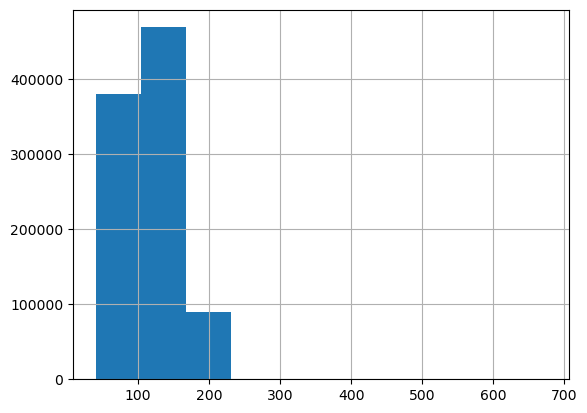

In [1984]:
gm4di['선별포인트'].hist();

##### [출력]

In [1985]:
gm4di.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '저감장치', '장치일련번호', '최초등록일자수정',
       '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자', '일일평균주행거리', '최근검사경과일', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '정기정밀', '운행제한건수', '수검일자구분',
       '선별포인트'],
      dtype='object')

In [1986]:
export4 = gm4di[[
    '차대번호', 
    '차량번호', 
    '법정동코드', 
    '연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export4.shape

(939139, 12)

###### [출력] 선별포인트 상위 100위 샘플

In [1987]:
g4_top100 = export4.sort_values(['선별포인트'], ascending=False)
g4_top100.head()

,차대번호,차량번호,법정동코드,연식,용도,차종,차종유형,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
48638,KMHJN81VP9U143755,22소6078,4311112100,2009,자가용,승용,중형,675.00000,0.00000,2077.65498,650.00000,0.00000
764257,KMFRA18NPBC043270,경남82아9185,4833033000,2011,영업용,화물,대형,610.00000,0.00000,2181.02486,268.00000,0.00000
738577,KMFGA17HPAC142432,경기91바3784,4159025321,2010,영업용,화물,중형,591.00000,9.00000,2009.98389,361.00000,0.00000
738409,KMFGA17HPAC130619,경기94아2289,4146110700,2010,영업용,화물,중형,589.00000,1.00000,1836.49325,540.00000,0.00000
737894,KMFGA17HPAC131841,충북80자4400,4311310400,2010,영업용,화물,중형,571.00000,9.00000,1719.21121,582.00000,0.00000


In [1988]:
g4_top100.iloc[:100].to_excel(os.path.join(df_fold, 'BD3-3_4등급경유차_우선차량선별_4가지_top100.xlsx'), index=False)

In [1991]:
chc_col = {
    '차대번호':'VIN', 
    '차량번호':'VHRNO', # 자동차등록번호
    '법정동코드':'STDG_CD', 
    '연식':'YRIDNW', 
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_백만원':'SPRT_CST',
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [1992]:
export4r = export4.rename(columns=chc_col)
export4r.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1', 'DY_AVRG_DRVNG_DSTNC',
       'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [1993]:
# 7.6s
# BD3-3_4등급경유차_우선차량선별
export4r.to_csv(os.path.join(df_fold, 'STD_BD_GRD4_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

#### 5등급 경유 N급

In [1994]:
gm5di.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수', '수검일자구분'],
      dtype='object')

In [1995]:
gm5di['검사일자'].isnull().sum()

0

In [1996]:
gm5di['일일평균주행거리'].isnull().sum()

0

###### 조기폐차 선별포인트

In [1997]:
# 선별조건선정
col = ['무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수']

In [1998]:
gm5di[col].dtypes

무부하매연측정치1    float64
일일평균주행거리     float64
최근검사경과일      float64
운행제한건수       float64
dtype: object

In [1999]:
gm5di[col].isnull().sum()

무부하매연측정치1    0
일일평균주행거리     0
최근검사경과일      0
운행제한건수       0
dtype: int64

In [2000]:
# # nan 값 0으로 채우기
# gm5di[col] = gm5di[col].fillna(0)
# gm5di[col].isnull().sum()

In [2001]:
gm5di_corr = gm5di[col].corr()
gm5di_corr

,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
무부하매연측정치1,1.00000,-0.08351,0.00378,-0.03187
일일평균주행거리,-0.08351,1.00000,-0.01126,0.06251
최근검사경과일,0.00378,-0.01126,1.00000,0.02925
운행제한건수,-0.03187,0.06251,0.02925,1.00000


###### [출력] 5등급 경유차 선별조건 상관계수

In [2002]:
t5 = pd.concat([gm5di_corr, gm5di_corr.sum()], axis=1)
t5 = t5.rename(columns={0:'합계'})
t5 = t5.reset_index()
t5

,index,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수,합계
0,무부하매연측정치1,1.00000,-0.08351,0.00378,-0.03187,0.88840
1,일일평균주행거리,-0.08351,1.00000,-0.01126,0.06251,0.96774
2,최근검사경과일,0.00378,-0.01126,1.00000,0.02925,1.02177
3,운행제한건수,-0.03187,0.06251,0.02925,1.00000,1.05989


In [2003]:
t5.columns

Index(['index', '무부하매연측정치1', '일일평균주행거리', '최근검사경과일', '운행제한건수', '합계'], dtype='object')

In [2004]:
chc_col = {
    'index':'LIST', 
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC', 
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '합계':'TOT_CRRLTN_CFFCNT',
}

In [2005]:
t5r = t5.rename(columns=chc_col)
t5r

,LIST,NOLOD_SMO_MEVLU1,DY_AVRG_DRVNG_DSTNC,RCNT_INSP_ELPSD_WHL,RUN_LMT_NOCS,TOT_CRRLTN_CFFCNT
0,무부하매연측정치1,1.00000,-0.08351,0.00378,-0.03187,0.88840
1,일일평균주행거리,-0.08351,1.00000,-0.01126,0.06251,0.96774
2,최근검사경과일,0.00378,-0.01126,1.00000,0.02925,1.02177
3,운행제한건수,-0.03187,0.06251,0.02925,1.00000,1.05989


###### [출력] 5등급경유차 상관계수

In [2006]:
# BD3-3_5등급경유차_상관계수
t5r.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_DS_CRRLTN_CFFCNT.csv'), index=False)

In [2007]:
gm5di_corr.sum()[col]

무부하매연측정치1   0.88840
일일평균주행거리    0.96774
최근검사경과일     1.02177
운행제한건수      1.05989
dtype: float64

In [2008]:
c1, c2, c3, c4 = gm5di_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4
w1, w2, w3, w4 = c1/sc1, c2/sc1, c3/sc1, c4/sc1
w1, w2, w3, w4

(0.22560712075865694,
 0.24575673425823677,
 0.25947773952496284,
 0.2691584054581434)

In [2009]:
gm5di['선별포인트'] = np.round(w1 * gm5di['무부하매연측정치1'] + w2 * gm5di['일일평균주행거리'] + w3 * gm5di['최근검사경과일'] + w4 * gm5di['운행제한건수'], 0)
gm5di['선별포인트'].isnull().sum()

0

In [2011]:
gm5di['선별포인트'].describe()

count   565609.00000
mean       120.53884
std         39.60455
min         43.00000
25%         90.00000
50%        118.00000
75%        150.00000
max        499.00000
Name: 선별포인트, dtype: float64

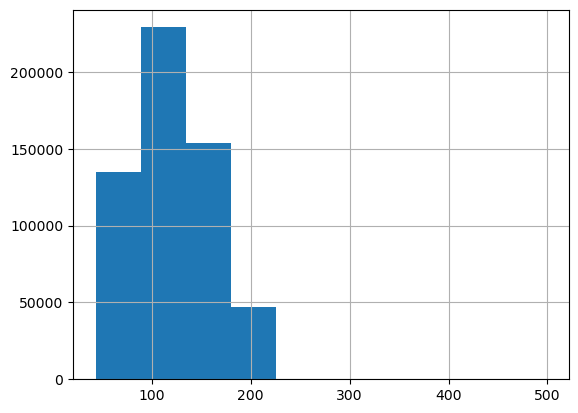

In [2010]:
gm5di['선별포인트'].hist();

##### [출력]

In [2012]:
gm5di.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '저감장치', '장치일련번호',
       '저감효율', '최초등록일자수정', '최근검사일자수정', '최근주행거리', '등록일기준검사일', '현재일자',
       '일일평균주행거리', '최근검사경과일', '시도', '시구군', '주행거리', '검사일자', '검사방법', '검사종류',
       '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2',
       '무부하매연측정치3', '정기정밀', '운행제한건수', '수검일자구분', '선별포인트'],
      dtype='object')

In [2013]:
gm5di['저감장치'].value_counts()

저감장치
DPF           83285
PM-NOx저감장치     1299
Name: count, dtype: int64

In [2014]:
gm5di['배출가스등급'].unique()

array(['5', 'T5'], dtype=object)

In [2015]:
export5 = gm5di[[
    '차대번호', 
    '차량등록번호', 
    '본거지법정동코드', 
    '차량연식', 
    '용도', 
    '차종', 
    '차종유형', 
    '저감장치',
    '선별포인트',
    '무부하매연측정치1', 
    '일일평균주행거리',
    '최근검사경과일', 
    '운행제한건수', 
    ]]
export5.shape

(565609, 13)

###### [출력] 5등급 경유차 선별포인트 상위 100위 샘플

In [2016]:
g5_top100 = export5.sort_values('선별포인트', ascending=False)
g5_top100.head()

,차대번호,차량등록번호,본거지법정동코드,차량연식,용도,차종,차종유형,저감장치,선별포인트,무부하매연측정치1,일일평균주행거리,최근검사경과일,운행제한건수
1062591,KMFGA17PP7C067736,서울85바5177,1150010500,2007,영업용,화물,중형,NaN,499.00000,12.00000,1629.00421,368.00000,0.00000
1028096,KMFLA18EP7C020816,경기89아3220,4141010400,2007,영업용,화물,대형,DPF,487.00000,1.00000,1498.62952,457.00000,0.00000
1032767,KL3C5CHF17K001032,전북86사9320,4571025326,2007,영업용,화물,대형,NaN,422.00000,8.00000,1416.96885,273.00000,6.00000
417903,KMFLA19AP2C029792,경기90아2687,4163011600,2002,영업용,화물,중형,DPF,415.00000,26.00000,996.54256,631.00000,0.00000
317012,KMEFE18CPYC007830,경북98사2198,4711125626,2000,영업용,특수,대형,NaN,390.00000,23.00000,1164.38849,379.00000,0.00000


In [2017]:
g5_top100.iloc[:100].to_excel(os.path.join(df_fold, 'BD3-3_5등급경유차_우선차량선별_4가지_top100.xlsx'), index=False)

In [2018]:
chc_col = {
    '차대번호':'VIN', 
    '차량등록번호':'VHRNO', # 자동차등록번호
    '본거지법정동코드':'STDG_CD', 
    '차량연식':'YRIDNW', # 연식
    '용도':'PURPS_CD2', 
    '차종':'VHCTY_CD', # 차종코드
    '차종유형':'VHCTY_TY', 
    '저감장치':'RDCDVC',
    '선별포인트':'SELCT_PNT',
    '무부하매연측정치1':'NOLOD_SMO_MEVLU1', 
    '일일평균주행거리':'DY_AVRG_DRVNG_DSTNC',
    '최근검사경과일':'RCNT_INSP_ELPSD_WHL', 
    '운행제한건수':'RUN_LMT_NOCS', 
    '지원비용_조기폐차_백만원':'SPRT_CST_ELPDSRC',
    '지원비용_DPF_백만원':'SPRT_CST_DPF', 
    '배기량_리터':'DSPLVL',
    '총중량_톤':'TOTL_WGHT',
}

In [2019]:
export5r = export5.rename(columns=chc_col)
export5r.columns

Index(['VIN', 'VHRNO', 'STDG_CD', 'YRIDNW', 'PURPS_CD2', 'VHCTY_CD',
       'VHCTY_TY', 'RDCDVC', 'SELCT_PNT', 'NOLOD_SMO_MEVLU1',
       'DY_AVRG_DRVNG_DSTNC', 'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_NOCS'],
      dtype='object')

In [2020]:
# 5.5s
# BD3-3_5등급경유차_우선차량선별
export5r.to_csv(os.path.join(df_fold, 'STD_BD_GRD5_LEM_PRIO_ORD_SELCT_CURSTT.csv'), index=False)

# code end